In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam(1).csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5891,spam,Urgent: Your Netflix account is suspended. Rea...,NaN,NaN,NaN
5892,spam,Your account access will be terminated in 24 h...,NaN,NaN,NaN
5893,spam,Important changes to your loyalty program bene...,NaN,NaN,NaN
5894,spam,Your government stimulus payment needs verific...,NaN,NaN,NaN


In [4]:
# from datasets import load_dataset

# ds = load_dataset("TrainingDataPro/email-spam-classification")

1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5896 non-null   object
 1   v2          5896 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 230.4+ KB


In [6]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5891,spam,Urgent: Your Netflix account is suspended. Rea...
5892,spam,Your account access will be terminated in 24 h...
5893,spam,Important changes to your loyalty program bene...
5894,spam,Your government stimulus payment needs verific...


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)#inplace=true for not reassigning df=df.rename
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5891,spam,Urgent: Your Netflix account is suspended. Rea...
5892,spam,Your account access will be terminated in 24 h...
5893,spam,Important changes to your loyalty program bene...
5894,spam,Your government stimulus payment needs verific...


In [8]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5891,1,Urgent: Your Netflix account is suspended. Rea...
5892,1,Your account access will be terminated in 24 h...
5893,1,Important changes to your loyalty program bene...
5894,1,Your government stimulus payment needs verific...


In [11]:
#for finding missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(553)

In [13]:
df=df.drop_duplicates(keep='first')


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5343, 2)

2.EDA

In [16]:
#ham=0 spam=1
df['target'].value_counts()

target
0    4516
1     827
Name: count, dtype: int64

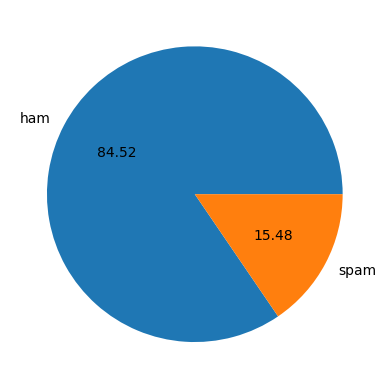

In [17]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()

In [18]:
# !pip install nltk
import nltk

In [19]:
#nltk.download('punkt')

In [20]:
#for counting number of characers used in each message
df['num_characters']=df['text'].apply(len)
df

C:\Users\vedan\AppData\Local\Temp\ipykernel_18496\1921134438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5881,1,Limited time: Weight loss miracle pill for $19...,72
5892,1,Your account access will be terminated in 24 h...,73
5893,1,Important changes to your loyalty program bene...,73
5894,1,Your government stimulus payment needs verific...,74


In [21]:
#for counting number of words used in each message
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))#lambda x: defines an anonymous (inline) function that takes each row's text (x) as input.
df


C:\Users\vedan\AppData\Local\Temp\ipykernel_18496\3787723012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))#lambda x: defines an anonymous (inline) function that takes each row's text (x) as input.


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5881,1,Limited time: Weight loss miracle pill for $19...,72,14
5892,1,Your account access will be terminated in 24 h...,73,13
5893,1,Important changes to your loyalty program bene...,73,11
5894,1,Your government stimulus payment needs verific...,74,10


In [22]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

C:\Users\vedan\AppData\Local\Temp\ipykernel_18496\1676715269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5881,1,Limited time: Weight loss miracle pill for $19...,72,14,1
5892,1,Your account access will be terminated in 24 h...,73,13,1
5893,1,Important changes to your loyalty program bene...,73,11,1
5894,1,Your government stimulus payment needs verific...,74,10,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5343.000000,5343.000000,5343.000000
mean,78.854389,18.276062,1.951713
std,57.315002,13.152290,1.431549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,63.000000,14.000000,1.000000
75%,114.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,827.000000,827.000000,827.000000
mean,124.697703,24.568319,2.669891
std,37.336446,8.747943,1.475744
min,13.000000,1.000000,1.000000
25%,82.000000,15.500000,1.000000
50%,141.000000,27.000000,2.000000
75%,156.000000,31.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

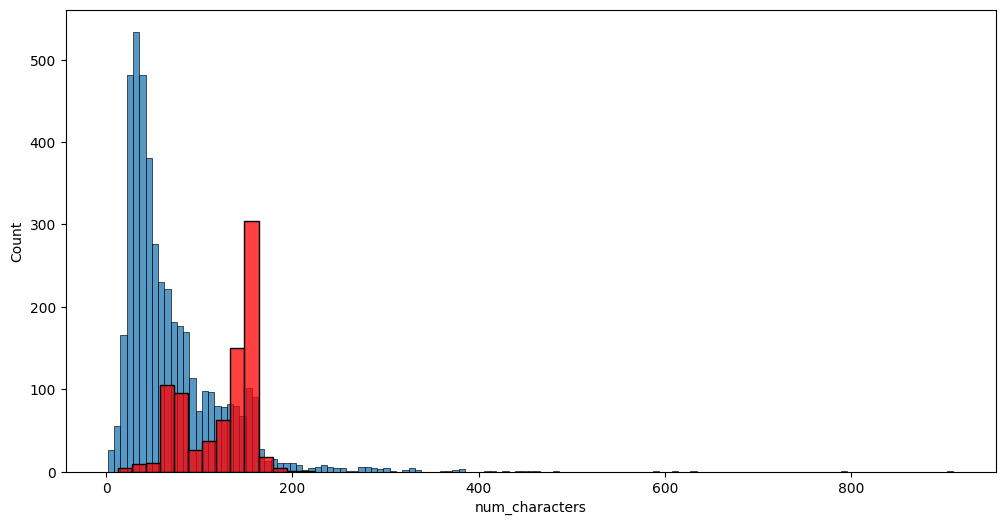

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

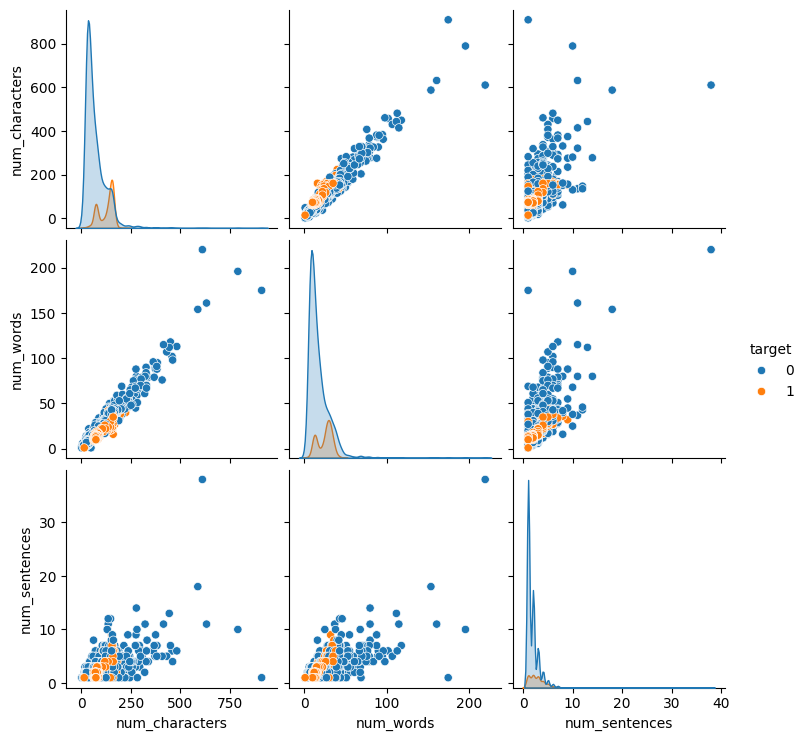

In [27]:
sns.pairplot(df,hue='target')

In [28]:
#sns.heatmap(df.corr(),annot=True)

DATA PREPROCESSING

In [29]:
#Steps for preprocessing:
#Lower case
#tokenize
#Removing special characters: keep only alpha numeric characters
#Removing Stop words and punctuation
#Stemming : bringing word to original form


In [30]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]

    for w in text:
        if w.isalnum():
            y.append(w)
    
    text=y[:]
    y.clear()

    for w in text:
        if w not in stopwords.words('english') and w not in string.punctuation:
            y.append(w)

    text=y[:]
    y.clear()
    stemmer = PorterStemmer()
    for w in text:
        y.append(stemmer.stem(w))

    return " ".join(y)




In [31]:
import pickle
with open("transform_text","wb") as f:
    pickle.dump(transform_text,f)

In [32]:
transform_text("What is your name ?")

'name'

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

C:\Users\vedan\AppData\Local\Temp\ipykernel_18496\2799170265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
#%pip install wordcloud

In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='red')


In [37]:
df[df['target']==1]['transformed_text'].str.cat()# .cat  concatenates all message as one string

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcvwinner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hourmobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 infourgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18xxxmobilemovieclub use credit click wap link next txt messag click httpengland v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wqthank subscript rington uk mobil charg pleas confirm repli ye repli charg07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrowsm ac sptv new jersey devil detroit red wing play i

In [38]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
spam_wc

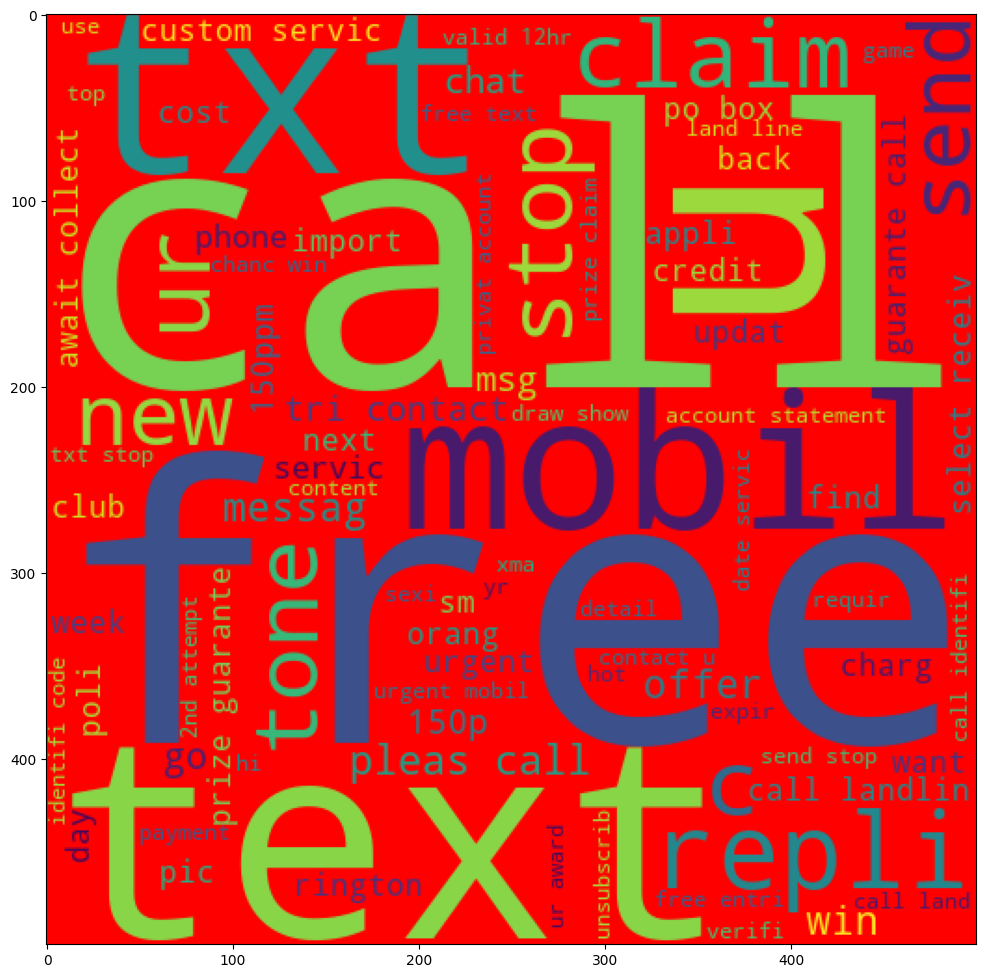

In [39]:
plt.figure(figsize=(12,18))
plt.imshow(spam_wc)

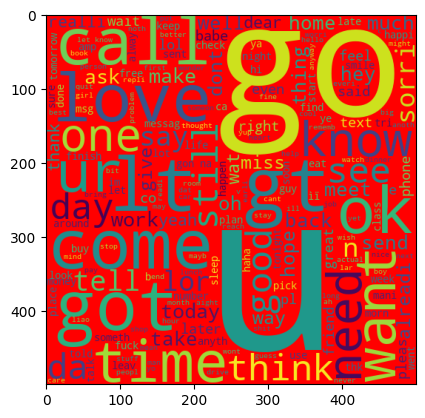

In [40]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [41]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


len(spam_corpus)

11029

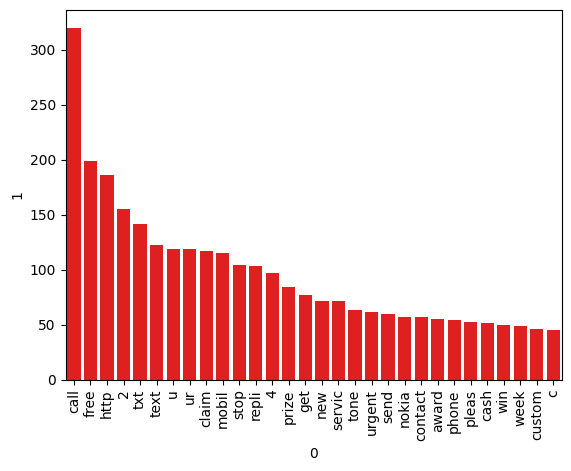

In [42]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


len(ham_corpus)

35404

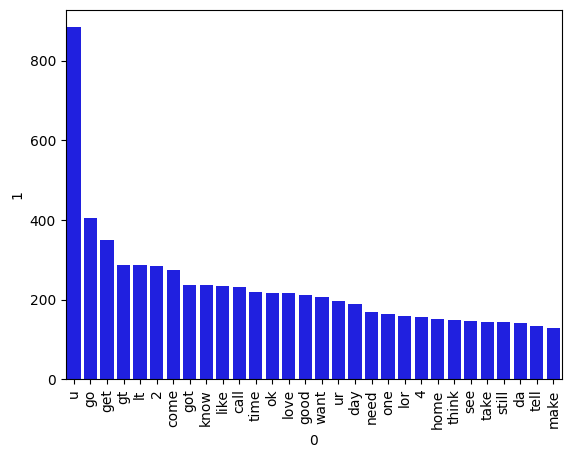

In [44]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='blue')
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)#use only top 3000 words from corpus

In [46]:
#X=cv.fit_transform(df['transformed_text']).toarray()#text to numerical vector conversion
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [48]:
#appending num_characters column to input X
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [49]:
X.shape

(5343, 3000)

In [50]:
y=df['target'].values

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

ACCURACY: Correctness (hitting the target).	: TP+TN/TP+TN+FN+FP

PRECISION: Consistency (hitting the same spot repeatedly). : TP/TP+FP

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8447146866230122
[[743 145]
 [ 21 160]]
0.5245901639344263


In [55]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#best precison with tfidf 

0.9738072965388214
[[888   0]
 [ 28 153]]
1.0


In [56]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9784845650140318
[[884   4]
 [ 19 162]]
0.9759036144578314


In [57]:
#tfidf -> MNB


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
# Use L1 (penalty='l1') when you need feature selection.
# Use L2 (penalty='l2') when you want to prevent overfitting without removing features.
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=42)
bc=BaggingClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [62]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy: ",current_accuracy)
    print("Precison: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy:  0.9766136576239476
Precison:  0.9875


c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

For KN
Accuracy:  0.8699719363891487
Precison:  1.0
For NB
Accuracy:  0.9738072965388214
Precison:  1.0
For DT
Accuracy:  0.9345182413470533
Precison:  0.8675496688741722
For LR
Accuracy:  0.9625818521983162
Precison:  0.9795918367346939
For RF
Accuracy:  0.9775491113189897
Precison:  0.9937106918238994


c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy:  0.9588400374181478
Precison:  0.959731543624161
For BgC
Accuracy:  0.9691300280636108
Precison:  0.9252873563218391
For ETC
Accuracy:  0.9812909260991581
Precison:  0.9878787878787879
For GBDT
Accuracy:  0.9438727782974743
Precison:  0.991869918699187
For xgb
Accuracy:  0.9681945743685687
Precison:  0.9741935483870968


In [63]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.869972,1.000000
2,NB,0.973807,1.000000
5,RF,0.977549,0.993711
9,GBDT,0.943873,0.991870
8,ETC,0.981291,0.987879
0,SVC,0.976614,0.987500
4,LR,0.962582,0.979592
10,xgb,0.968195,0.974194
6,AdaBoost,0.958840,0.959732
7,BgC,0.969130,0.925287


In [64]:
#pd.melt() is used to convert wide-format data into long-format.
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.869972
1,NB,Accuracy,0.973807
2,RF,Accuracy,0.977549
3,GBDT,Accuracy,0.943873
4,ETC,Accuracy,0.981291
5,SVC,Accuracy,0.976614
6,LR,Accuracy,0.962582
7,xgb,Accuracy,0.968195
8,AdaBoost,Accuracy,0.958840
9,BgC,Accuracy,0.969130


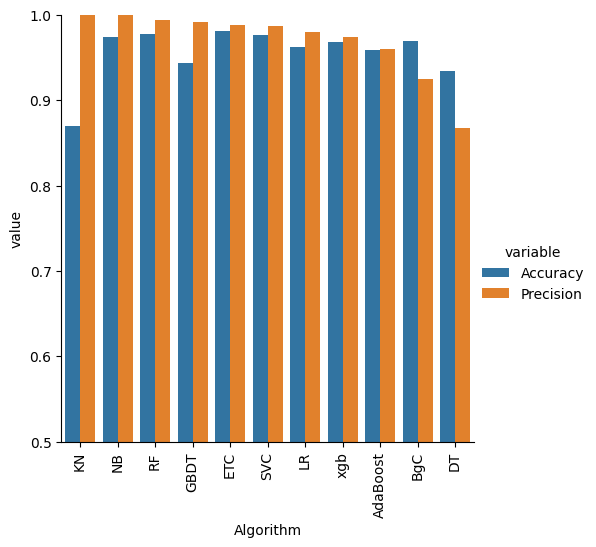

In [65]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

IMPORVING THE MODEL

In [66]:
#Voting Classifier
#taking best models and combining them 

svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [67]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9869036482694107
Precision 1.0


In [68]:
#Applying Stacking

In [69]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier(n_jobs=-1)

from sklearn.ensemble import StackingClassifier

clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9859681945743686
Precision 0.9825581395348837


In [70]:
mnb.fit(X_train,y_train)#********* IMPORTANT

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))